# Notebook 1: Neural ODE 2D Classification

Este notebook implementa e treina Neural ODEs para classificação em dados 2D.

## Objetivos:
1. Implementar VectorField e NeuralODE com classificação
2. Treinar em dataset 2D sintético (moons, circles, spirals)
3. Visualizar trajetórias a partir de dados do dataset (x(0) → x(1))
4. Visualizar transformações a partir de z ~ N(0,I) (z(0) → x(1))
5. Visualizar vector fields
6. Analisar NFEs e comparar solvers


In [2]:
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import torch
import torch.optim as optim
from src.models.neural_ode import NeuralODE
from src.models.vector_field import VectorField
from src.utils.datasets import Synthetic2D, get_dataloader
from src.utils.training import train_neural_ode, count_nfe
from src.utils.visualization import (
    plot_data_distribution,
    plot_trajectories,
    plot_transformation,
    plot_vector_field,
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


## 1. Carregar Dataset


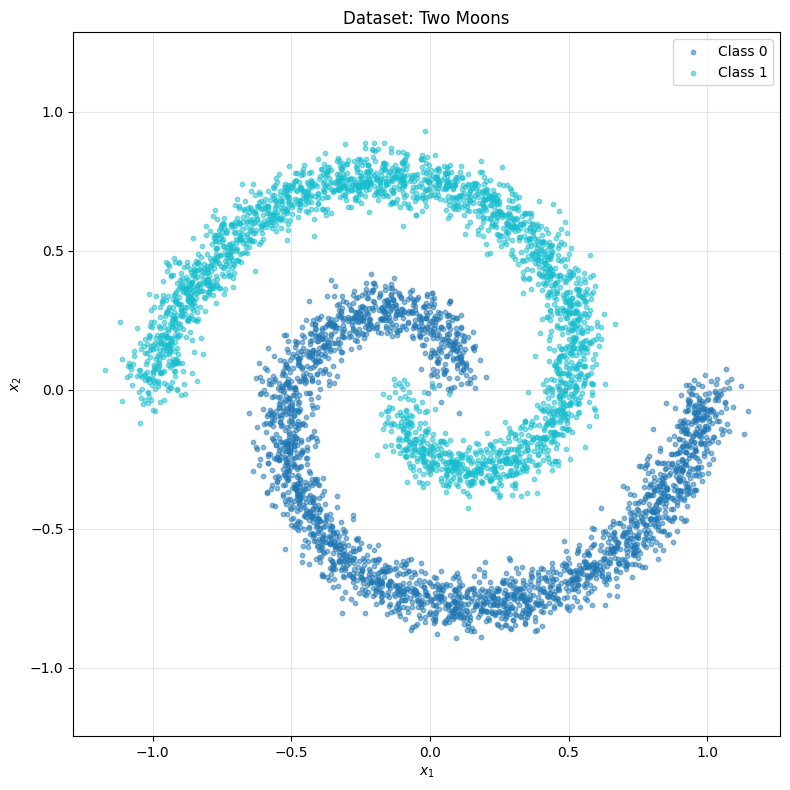

Dataset size: 5000
Number of classes: 2


In [3]:
# Criar dataset (moons, circles, ou spirals - todos têm 2 classes)
dataset = Synthetic2D(n_samples=5000, noise=0.05, dataset_type='spirals')
dataloader = get_dataloader(dataset, batch_size=128, shuffle=True)

# Visualizar dados com cores por classe
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_data_distribution(
    dataset.data,
    labels=dataset.labels,
    ax=ax,
    title="Dataset: Two Moons"
)
plt.tight_layout()
plt.show()

print(f"Dataset size: {len(dataset)}")
print(f"Number of classes: {len(torch.unique(dataset.labels))}")


## 2. Criar e Treinar Modelo


In [8]:
# Criar modelo com classificação (2 classes para moons/circles/spirals)
vf = VectorField(features=2, hidden_dims=[64, 64], time_embed_dim=16)
model = NeuralODE(
    vf,
    solver='dopri5',
    rtol=1e-3,
    atol=1e-4,
    num_classes=2  # 2 classes para datasets sintéticos
).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Treinar para classificação
train_neural_ode(model, dataloader, optimizer, device, num_epochs=50)


Epoch 1/50: 100%|██████████| 40/40 [00:03<00:00, 11.86it/s]


Epoch 1, Loss: 0.597819, Accuracy: 71.52%


Epoch 2/50: 100%|██████████| 40/40 [00:04<00:00,  9.58it/s]


Epoch 2, Loss: 0.436282, Accuracy: 73.10%


Epoch 3/50: 100%|██████████| 40/40 [00:02<00:00, 13.82it/s]


Epoch 3, Loss: 0.365104, Accuracy: 77.18%


Epoch 4/50: 100%|██████████| 40/40 [00:02<00:00, 13.33it/s]


Epoch 4, Loss: 0.263984, Accuracy: 86.80%


Epoch 5/50: 100%|██████████| 40/40 [00:02<00:00, 16.83it/s]


Epoch 5, Loss: 0.151974, Accuracy: 95.56%


Epoch 6/50: 100%|██████████| 40/40 [00:03<00:00, 11.11it/s]


Epoch 6, Loss: 0.106112, Accuracy: 96.80%


Epoch 7/50: 100%|██████████| 40/40 [00:02<00:00, 15.24it/s]


Epoch 7, Loss: 0.082580, Accuracy: 97.30%


Epoch 8/50: 100%|██████████| 40/40 [00:02<00:00, 19.72it/s]


Epoch 8, Loss: 0.070154, Accuracy: 97.44%


Epoch 9/50: 100%|██████████| 40/40 [00:02<00:00, 17.22it/s]


Epoch 9, Loss: 0.057091, Accuracy: 98.06%


Epoch 10/50: 100%|██████████| 40/40 [00:02<00:00, 17.28it/s]


Epoch 10, Loss: 0.049461, Accuracy: 98.28%


Epoch 11/50: 100%|██████████| 40/40 [00:02<00:00, 18.94it/s]


Epoch 11, Loss: 0.043310, Accuracy: 98.40%


Epoch 12/50: 100%|██████████| 40/40 [00:02<00:00, 16.57it/s]


Epoch 12, Loss: 0.033910, Accuracy: 98.86%


Epoch 13/50: 100%|██████████| 40/40 [00:02<00:00, 16.67it/s]


Epoch 13, Loss: 0.026954, Accuracy: 99.12%


Epoch 14/50: 100%|██████████| 40/40 [00:02<00:00, 17.91it/s]


Epoch 14, Loss: 0.027633, Accuracy: 99.22%


Epoch 15/50: 100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch 15, Loss: 0.029780, Accuracy: 99.00%


Epoch 16/50: 100%|██████████| 40/40 [00:03<00:00, 13.09it/s]


Epoch 16, Loss: 0.013458, Accuracy: 99.50%


Epoch 17/50: 100%|██████████| 40/40 [00:03<00:00, 12.52it/s]


Epoch 17, Loss: 0.014307, Accuracy: 99.52%


Epoch 18/50: 100%|██████████| 40/40 [00:02<00:00, 15.78it/s]


Epoch 18, Loss: 0.013028, Accuracy: 99.68%


Epoch 19/50: 100%|██████████| 40/40 [00:02<00:00, 14.85it/s]


Epoch 19, Loss: 0.019396, Accuracy: 99.36%


Epoch 20/50: 100%|██████████| 40/40 [00:02<00:00, 19.17it/s]


Epoch 20, Loss: 0.021682, Accuracy: 99.30%


Epoch 21/50: 100%|██████████| 40/40 [00:02<00:00, 17.89it/s]


Epoch 21, Loss: 0.009275, Accuracy: 99.60%


Epoch 22/50: 100%|██████████| 40/40 [00:02<00:00, 14.96it/s]


Epoch 22, Loss: 0.007557, Accuracy: 99.72%


Epoch 23/50: 100%|██████████| 40/40 [00:03<00:00, 12.96it/s]


Epoch 23, Loss: 0.007627, Accuracy: 99.76%


Epoch 24/50: 100%|██████████| 40/40 [00:03<00:00, 13.18it/s]


Epoch 24, Loss: 0.007325, Accuracy: 99.74%


Epoch 25/50: 100%|██████████| 40/40 [00:02<00:00, 14.62it/s]


Epoch 25, Loss: 0.006589, Accuracy: 99.82%


Epoch 26/50: 100%|██████████| 40/40 [00:03<00:00, 12.81it/s]


Epoch 26, Loss: 0.007365, Accuracy: 99.68%


Epoch 27/50: 100%|██████████| 40/40 [00:03<00:00, 11.59it/s]


Epoch 27, Loss: 0.005741, Accuracy: 99.86%


Epoch 28/50: 100%|██████████| 40/40 [00:02<00:00, 13.87it/s]


Epoch 28, Loss: 0.007009, Accuracy: 99.78%


Epoch 29/50: 100%|██████████| 40/40 [00:02<00:00, 14.87it/s]


Epoch 29, Loss: 0.004828, Accuracy: 99.84%


Epoch 30/50: 100%|██████████| 40/40 [00:02<00:00, 17.17it/s]


Epoch 30, Loss: 0.004873, Accuracy: 99.84%


Epoch 31/50: 100%|██████████| 40/40 [00:02<00:00, 14.80it/s]


Epoch 31, Loss: 0.005855, Accuracy: 99.86%


Epoch 32/50: 100%|██████████| 40/40 [00:03<00:00, 12.27it/s]


Epoch 32, Loss: 0.004834, Accuracy: 99.84%


Epoch 33/50: 100%|██████████| 40/40 [00:02<00:00, 14.39it/s]


Epoch 33, Loss: 0.007204, Accuracy: 99.84%


Epoch 34/50: 100%|██████████| 40/40 [00:02<00:00, 13.89it/s]


Epoch 34, Loss: 0.023214, Accuracy: 99.18%


Epoch 35/50: 100%|██████████| 40/40 [00:02<00:00, 15.48it/s]


Epoch 35, Loss: 0.005024, Accuracy: 99.82%


Epoch 36/50: 100%|██████████| 40/40 [00:02<00:00, 16.86it/s]


Epoch 36, Loss: 0.004579, Accuracy: 99.82%


Epoch 37/50: 100%|██████████| 40/40 [00:02<00:00, 16.40it/s]


Epoch 37, Loss: 0.006097, Accuracy: 99.82%


Epoch 38/50: 100%|██████████| 40/40 [00:02<00:00, 18.35it/s]


Epoch 38, Loss: 0.004477, Accuracy: 99.88%


Epoch 39/50: 100%|██████████| 40/40 [00:02<00:00, 18.14it/s]


Epoch 39, Loss: 0.003327, Accuracy: 99.86%


Epoch 40/50: 100%|██████████| 40/40 [00:02<00:00, 16.44it/s]


Epoch 40, Loss: 0.003489, Accuracy: 99.88%


Epoch 41/50: 100%|██████████| 40/40 [00:02<00:00, 16.56it/s]


Epoch 41, Loss: 0.005024, Accuracy: 99.84%


Epoch 42/50: 100%|██████████| 40/40 [00:02<00:00, 16.56it/s]


Epoch 42, Loss: 0.003379, Accuracy: 99.86%


Epoch 43/50: 100%|██████████| 40/40 [00:02<00:00, 15.75it/s]


Epoch 43, Loss: 0.003849, Accuracy: 99.84%


Epoch 44/50: 100%|██████████| 40/40 [00:02<00:00, 14.89it/s]


Epoch 44, Loss: 0.003904, Accuracy: 99.90%


Epoch 45/50: 100%|██████████| 40/40 [00:03<00:00, 12.86it/s]


Epoch 45, Loss: 0.003681, Accuracy: 99.94%


Epoch 46/50: 100%|██████████| 40/40 [00:02<00:00, 14.61it/s]


Epoch 46, Loss: 0.010458, Accuracy: 99.90%


Epoch 47/50: 100%|██████████| 40/40 [00:02<00:00, 18.16it/s]


Epoch 47, Loss: 0.030931, Accuracy: 98.94%


Epoch 48/50: 100%|██████████| 40/40 [00:02<00:00, 18.77it/s]


Epoch 48, Loss: 0.005936, Accuracy: 99.78%


Epoch 49/50: 100%|██████████| 40/40 [00:02<00:00, 18.45it/s]


Epoch 49, Loss: 0.005741, Accuracy: 99.82%


Epoch 50/50: 100%|██████████| 40/40 [00:02<00:00, 17.32it/s]

Epoch 50, Loss: 0.005948, Accuracy: 99.80%


0.005947776919492753

## 3. Visualizar Trajetórias


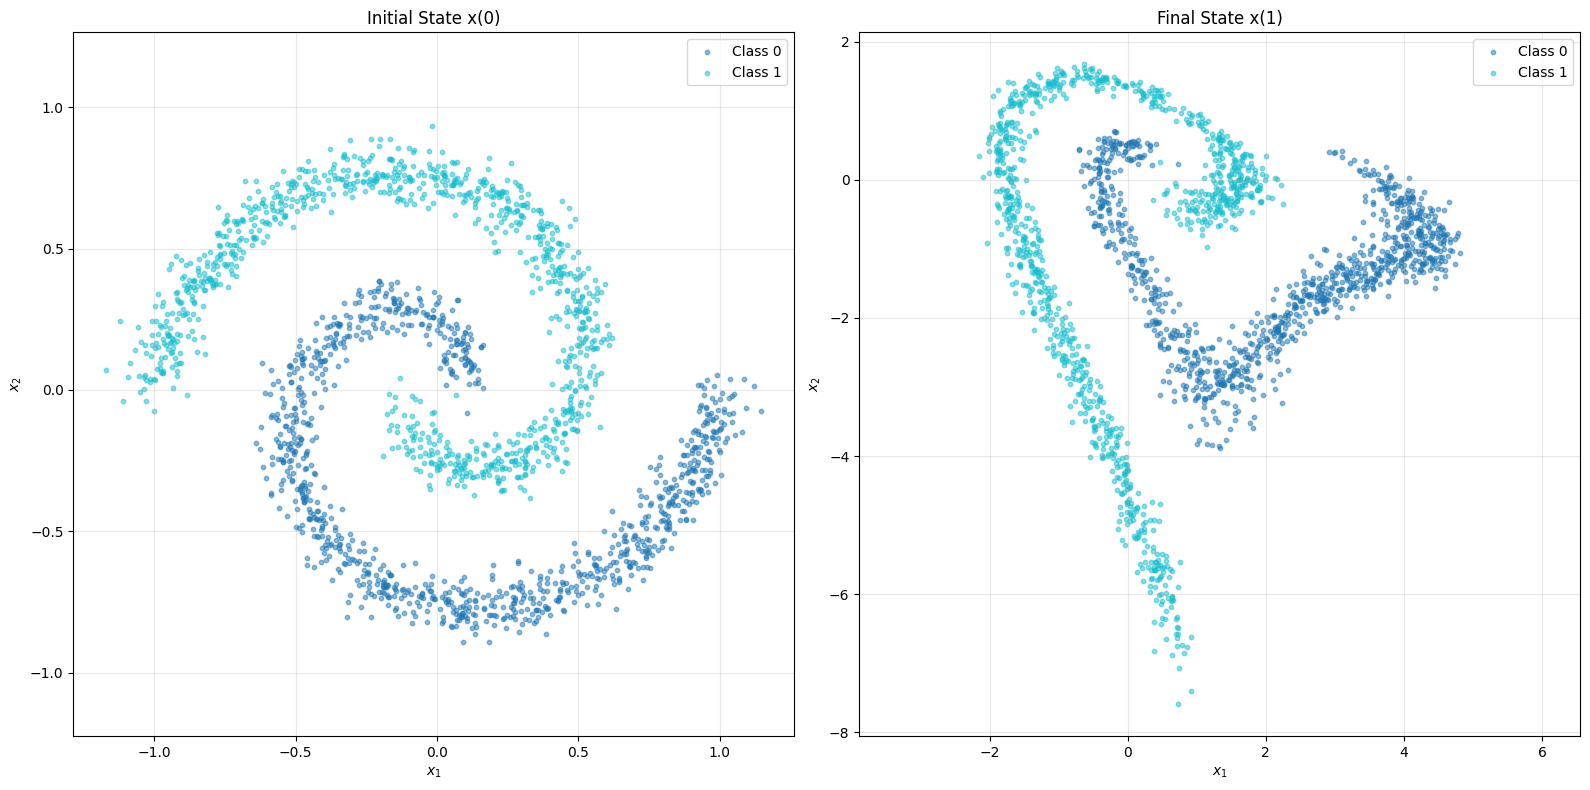

In [ ]:
plot_trajectories(model, dataset, n_samples=1000)
plt.tight_layout()
plt.show()


## 4. Visualizar Vector Field


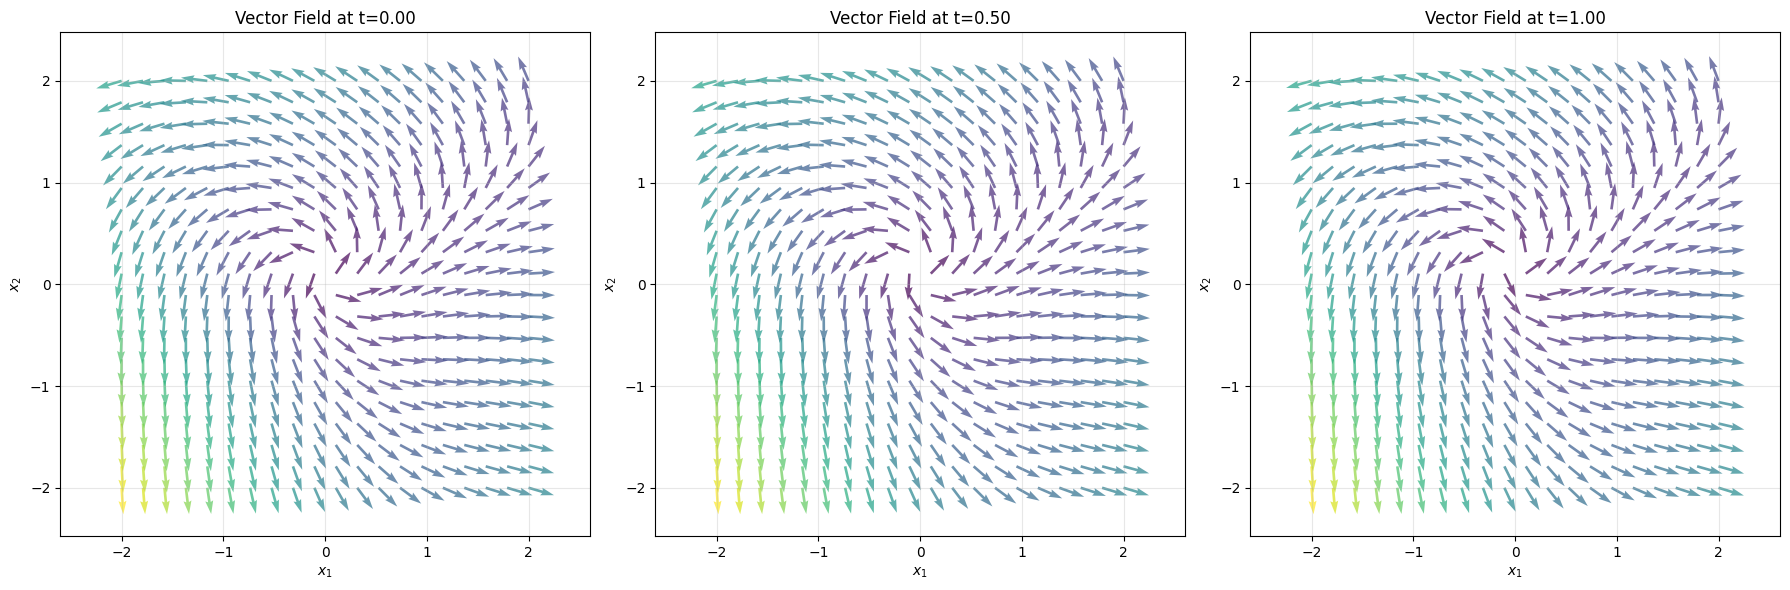

In [10]:
# Plotar vector field em diferentes tempos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, t in enumerate([0.0, 0.5, 1.0]):
    plot_vector_field(
        model,
        xlim=(-2, 2),
        ylim=(-2, 2),
        n_grid=20,
        t=t,
        ax=axes[i]
    )
plt.tight_layout()
plt.show()


## 5. Visualizar Transformação


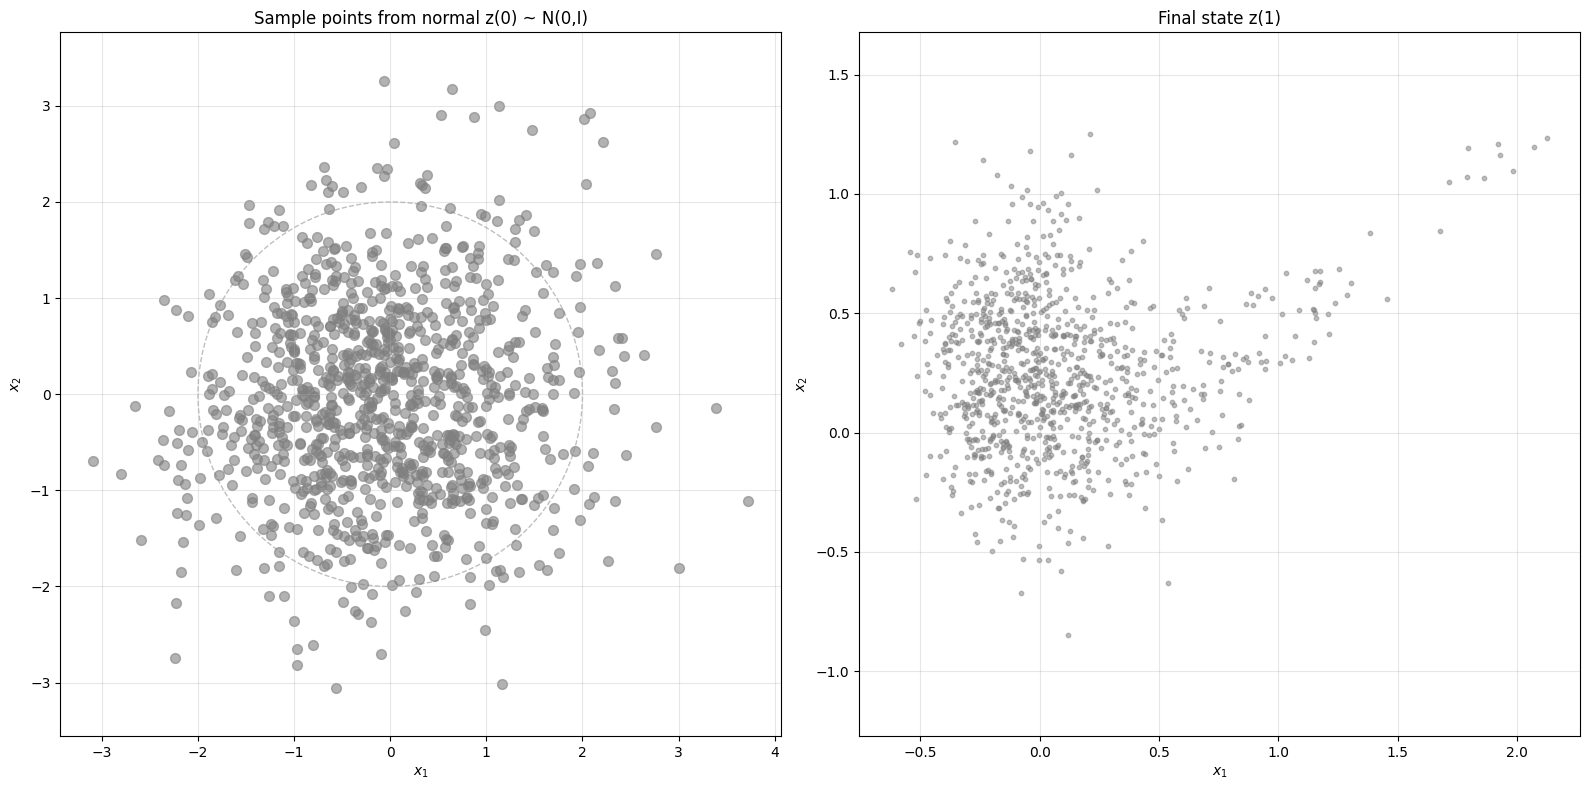

In [11]:
plot_transformation(
    model,
    n_samples=1000,
    n_trajectory_points=100
)
plt.tight_layout()
plt.show()


## 6. Analisar NFEs (Number of Function Evaluations)


In [13]:
# Comparar diferentes solvers
solvers = ['euler', 'rk4', 'dopri5']
nfe_results = {}

# Usar amostras de N(0, I) para contagem de NFEs
sample_batch = torch.randn(10, 2).to(device)

print("=== Comparação de Solvers ===")
for solver in solvers:
    vf_test = VectorField(features=2, hidden_dims=[64, 64], time_embed_dim=16)
    model_test = NeuralODE(
        vf_test,
        solver=solver,
        rtol=1e-3,
        atol=1e-4,
        num_classes=2  # Necessário para classificação
    ).to(device)
    # Copiar apenas os pesos do vector field (não do classifier)
    model_test.vf.load_state_dict(model.vf.state_dict())
    if model.classifier is not None:
        model_test.classifier.load_state_dict(model.classifier.state_dict())

    nfe = count_nfe(model_test, sample_batch)
    nfe_results[solver] = nfe
    print(f"{solver}: {nfe} NFEs")

# Comparar diferentes tolerâncias
tolerances = [(1e-2, 1e-3), (1e-3, 1e-4), (1e-4, 1e-5)]
nfe_tol_results = {}

print("\n=== Comparação de Tolerâncias (dopri5) ===")
for rtol, atol in tolerances:
    vf_test = VectorField(features=2, hidden_dims=[64, 64], time_embed_dim=16)
    model_test = NeuralODE(
        vf_test,
        solver='dopri5',
        rtol=rtol,
        atol=atol,
        num_classes=2
    ).to(device)
    model_test.vf.load_state_dict(model.vf.state_dict())
    if model.classifier is not None:
        model_test.classifier.load_state_dict(model.classifier.state_dict())

    nfe = count_nfe(model_test, sample_batch)
    nfe_tol_results[(rtol, atol)] = nfe
    print(f"rtol={rtol}, atol={atol}: {nfe} NFEs")


=== Comparação de Solvers ===
euler: 1 NFEs
rk4: 4 NFEs
dopri5: 20 NFEs

=== Comparação de Tolerâncias (dopri5) ===
rtol=0.01, atol=0.001: 20 NFEs
rtol=0.001, atol=0.0001: 20 NFEs
rtol=0.0001, atol=1e-05: 32 NFEs
